<a href="https://colab.research.google.com/github/milxss/Medium/blob/main/5_Ways_to_Use_TS_for_Your_Business/anomaly_detection_ts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np

# Create a mock production dataset
dates = pd.date_range(start='2021-01-01', end='2021-04-01', freq='D')
production_data = pd.DataFrame({'Date': dates, 'Production': np.random.normal(1000, 100, len(dates))})
production_data.set_index('Date', inplace=True)

# Save the dataset to a CSV file
production_data.to_csv('production_data.csv')


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Load the data
production_data = pd.read_csv('/content/production_data.csv', parse_dates=['Date'], index_col='Date')


In [15]:
production_data.head()

,Production
Date,
2021-01-01,991.158411
2021-01-02,1068.905531
2021-01-03,1086.120815
2021-01-04,1096.576864
2021-01-05,1063.285826


In [16]:
# Create the model
model = IsolationForest(n_estimators=100, contamination=0.01)

# Fit the model
model.fit(production_data)



/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.01)

In [17]:
# Make a prediction
predictions = model.predict(production_data)

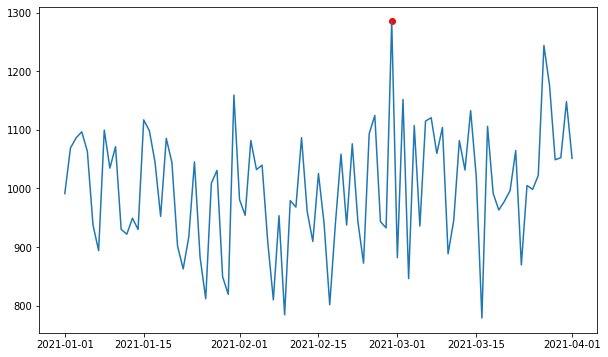

In [23]:
# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(production_data)
plt.scatter(production_data.index[predictions==-1], production_data[predictions==-1], color='red')
plt.show()